___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

After taking Machine learning deployment course, you will able to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the ***Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU


# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model

## #Importing Modules and Predefined Functions#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("HR_Dataset.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [4]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(Dataset(df, label = "left" ,
                                       cat_features = df.select_dtypes(include=['object']).columns.tolist()))
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

## 1. Exploratory Data Analysis

### 1.1. Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [6]:
df.describe().T

count    mean    std    min     25%     50%     75%  \
satisfaction_level    14999.000   0.613  0.249  0.090   0.440   0.640   0.820   
last_evaluation       14999.000   0.716  0.171  0.360   0.560   0.720   0.870   
number_project        14999.000   3.803  1.233  2.000   3.000   4.000   5.000   
average_montly_hours  14999.000 201.050 49.943 96.000 156.000 200.000 245.000   
time_spend_company    14999.000   3.498  1.460  2.000   3.000   3.000   4.000   
Work_accident         14999.000   0.145  0.352  0.000   0.000   0.000   0.000   
left                  14999.000   0.238  0.426  0.000   0.000   0.000   0.000   
promotion_last_5years 14999.000   0.021  0.144  0.000   0.000   0.000   0.000   

                          max  
satisfaction_level      1.000  
last_evaluation         1.000  
number_project          7.000  
average_montly_hours  310.000  
time_spend_company     10.000  
Work_accident           1.000  
left                    1.000  
promotion_last_5years   1.000

In [7]:
df.shape

(14999, 10)

In [8]:
df.duplicated().sum()

3008

In [9]:
df[df.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                 0.460            0.570               2   
866                 0.410            0.460               2   
1317                0.370            0.510               2   
1368                0.410            0.520               2   
1461                0.420            0.530               2   
...                   ...              ...             ...   
14994               0.400            0.570               2   
14995               0.370            0.480               2   
14996               0.370            0.530               2   
14997               0.110            0.960               6   
14998               0.370            0.520               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317                    127                   3              0     1   
1368                    132                   3              0     1   
1461                    142                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Departments   salary  
396                        0        sales     low  
866                        0   accounting     low  
1317                       0        sales  medium  
1368                       0        RandD     low  
1461                       0        sales     low  
...                      ...          ...     ...  
14994                      0      support     low  
14995                      0      support     low  
14996                      0      support     low  
14997                      0      support     low  
14998                      0      support     low  

[3008 rows x 10 columns]

In [10]:
#df.drop_duplicates(keep="first", inplace=True, ignore_index=True)

In [11]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [12]:
df.shape

(14999, 10)

In [13]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [14]:
df.rename(columns={'Departments ': 'departments', 'Work_accident':'work_accident'}, inplace=True)

## 2. Data Visualization

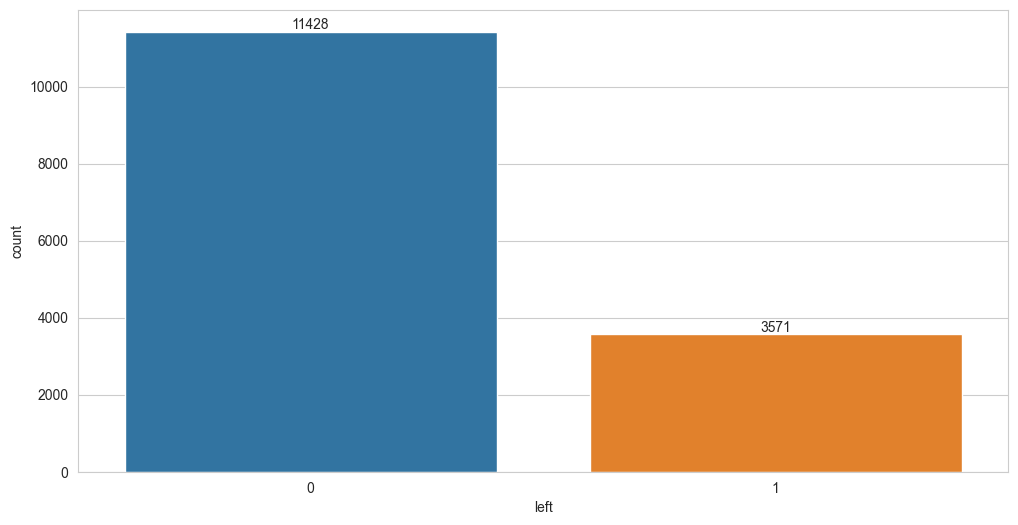

In [15]:
ax = sns.countplot(x=df["left"])
ax.bar_label(ax.containers[0]);

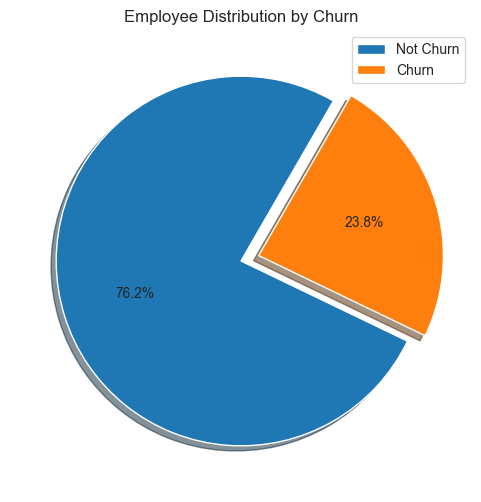

In [16]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['left'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=60)
plt.legend(labels=['Not Churn','Churn'])
plt.title('Employee Distribution by Churn')
plt.axis('off')
plt.show()

In [17]:
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

departments has 10 unique value
salary has 3 unique value


In [18]:
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].unique()} unique value")

departments has ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] unique value
salary has ['low' 'medium' 'high'] unique value


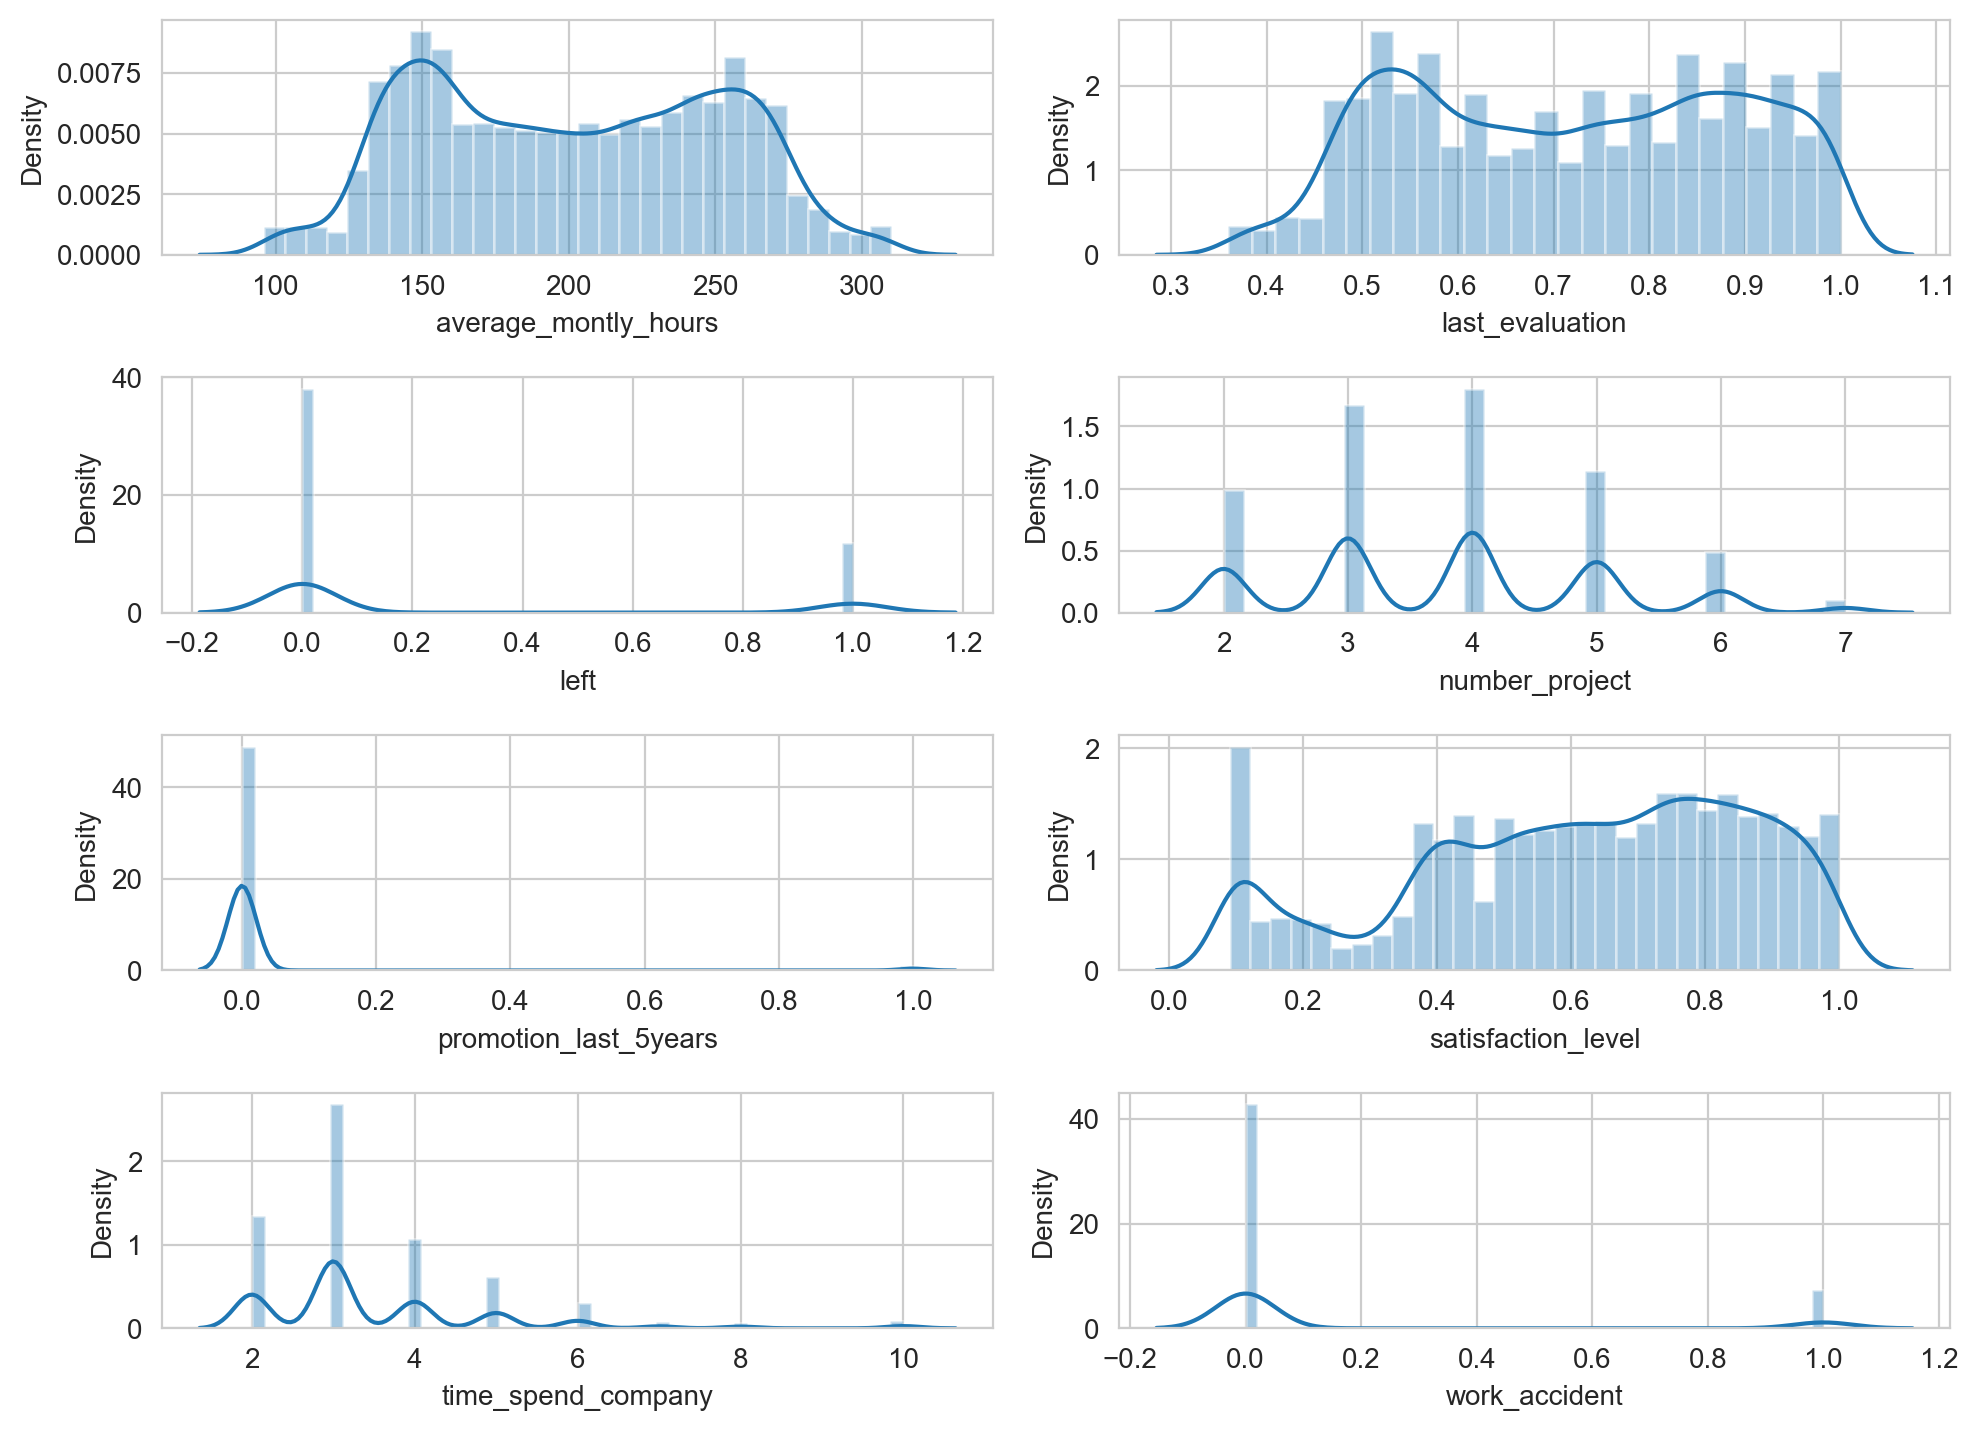

In [19]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.select_dtypes("int")[:-1] | df.select_dtypes("float")[:-1]):
        plt.subplot(8,2,i+1)
        sns.distplot(df[col],)
plt.tight_layout();

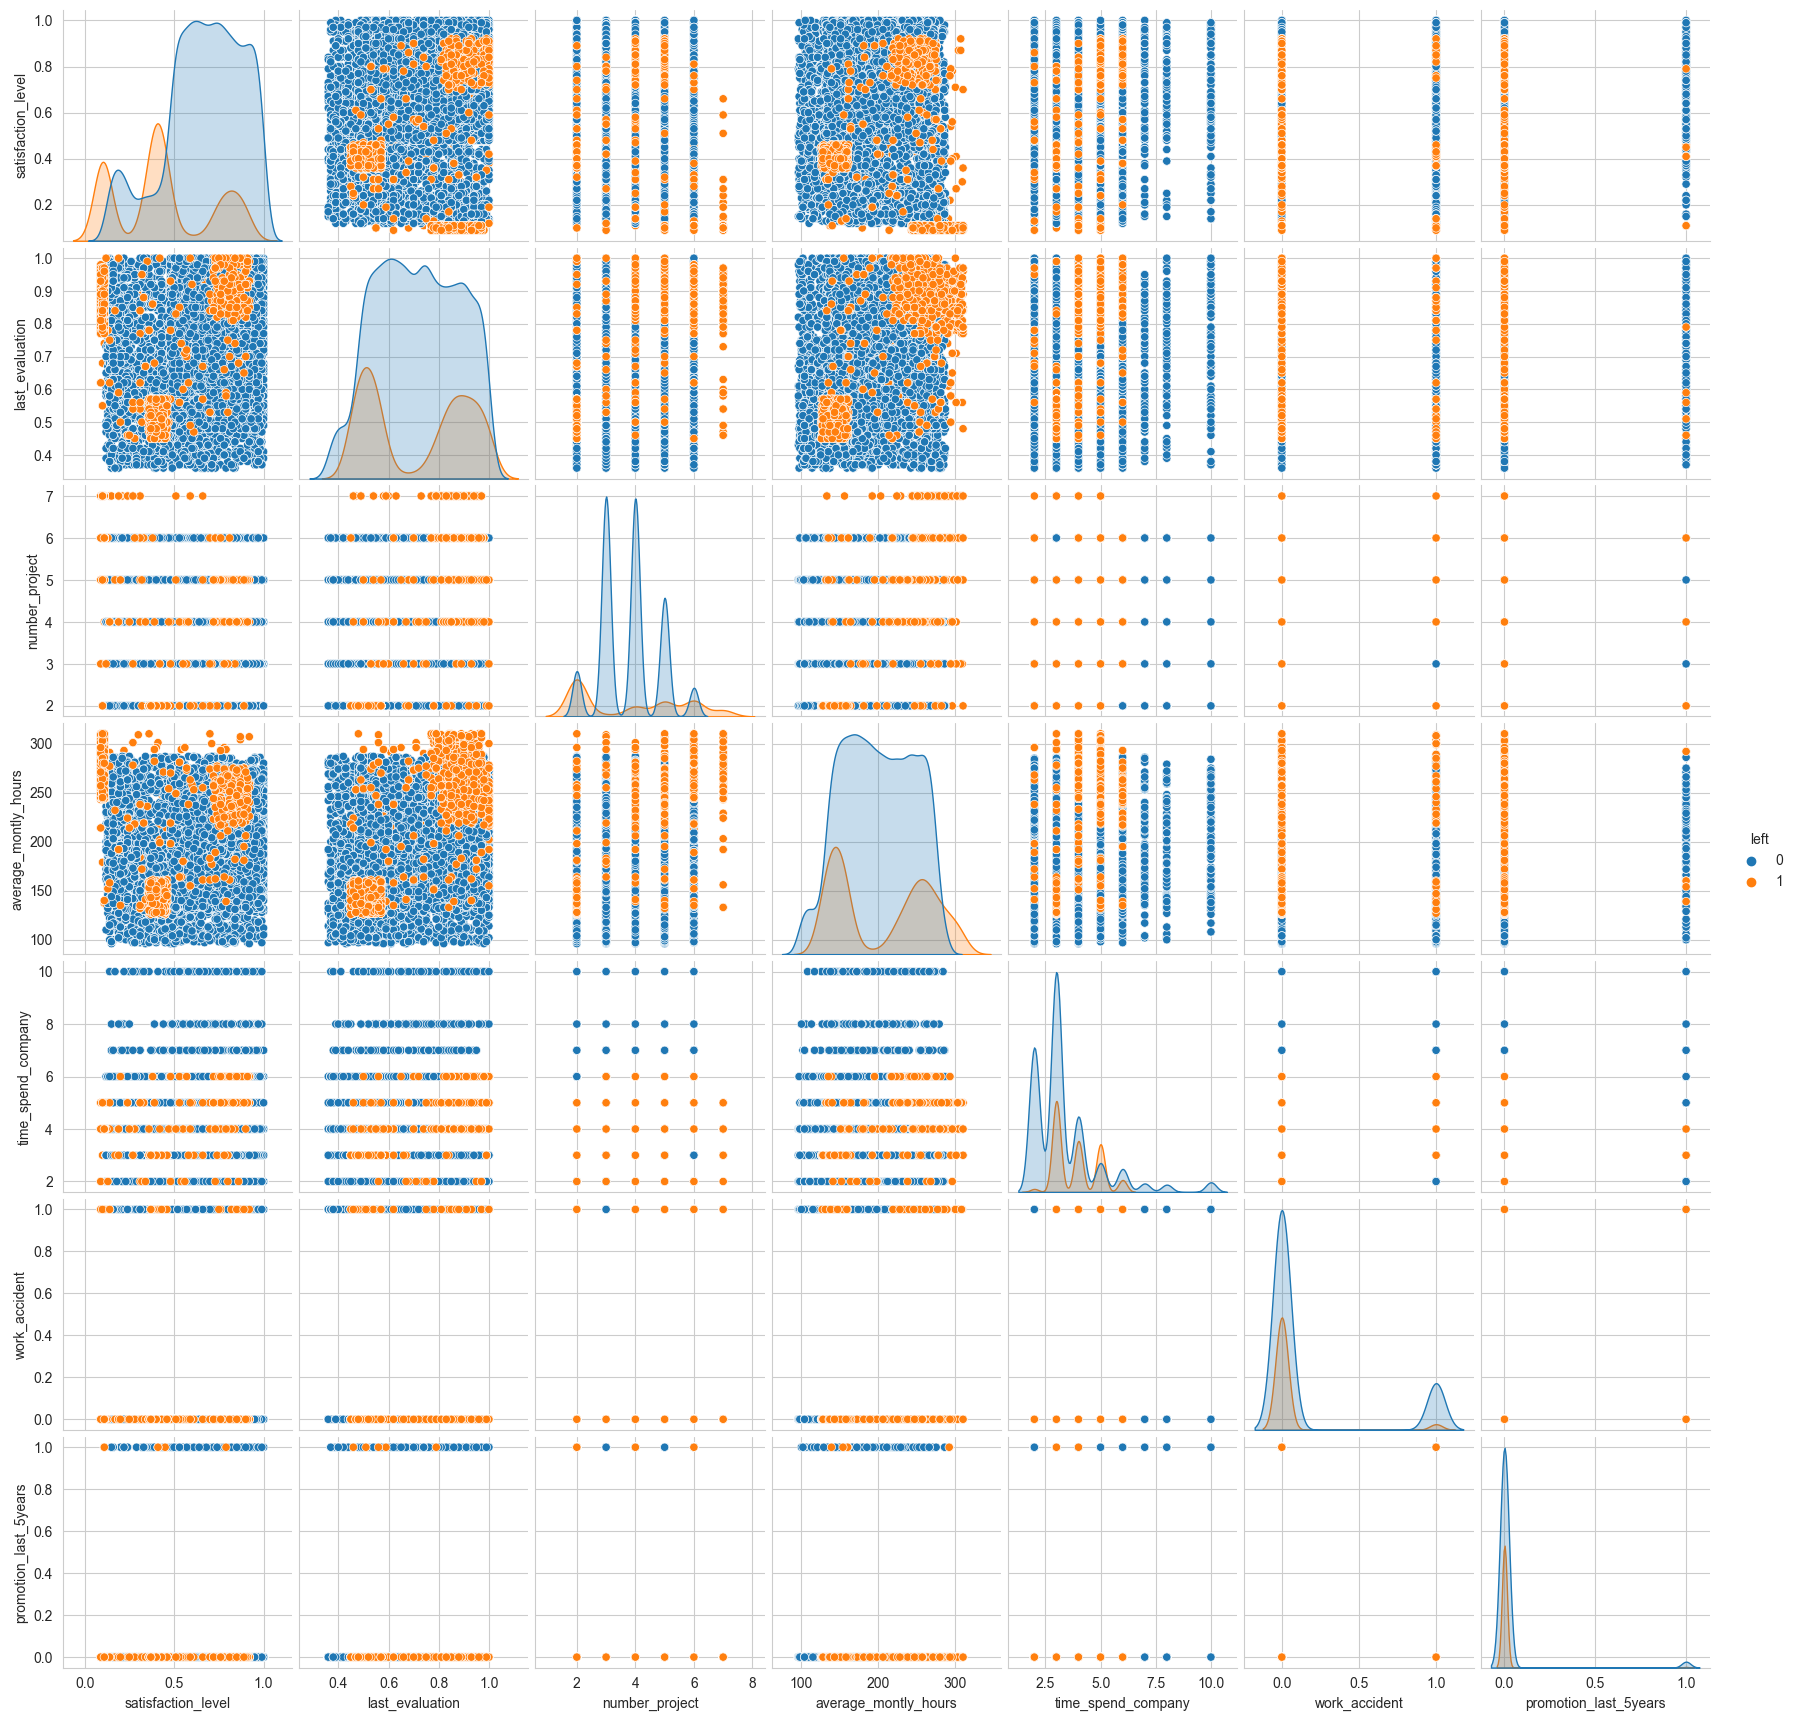

In [20]:
sns.pairplot(df, hue="left")

In [21]:
from ipywidgets import widgets, interact
def column_box(col):
    sns.boxplot(data = df,
                y= df[col], 
                x=df["left"], 
                palette='Dark2')
cols = df.columns
interact(column_box, col=cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'number_pr…

In [22]:
df.departments.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: departments, dtype: int64

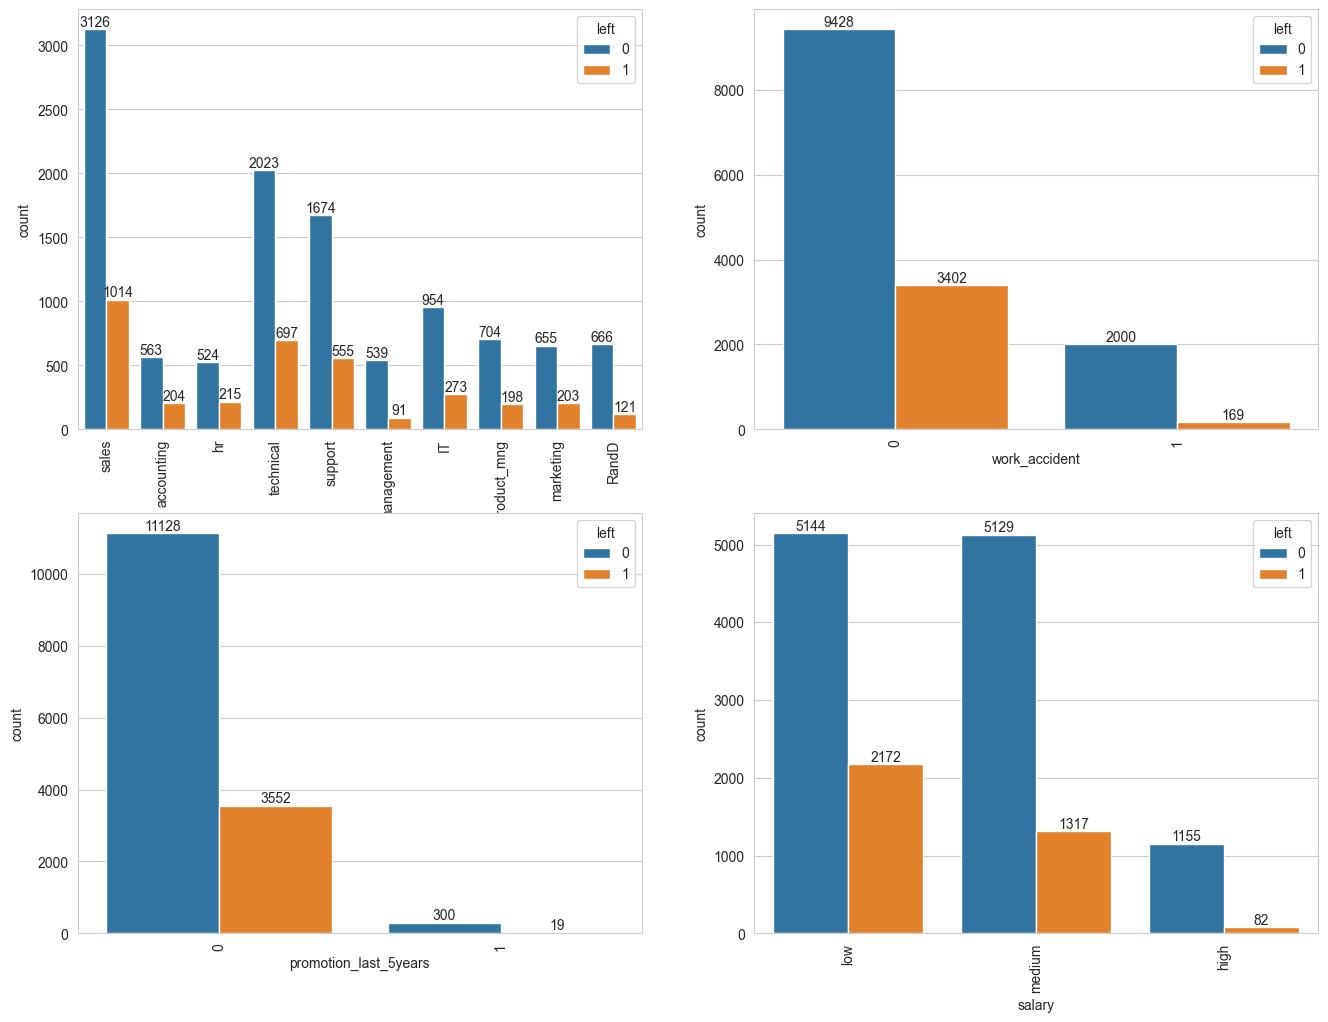

In [23]:
cat_list = ["departments", "work_accident", "promotion_last_5years", "salary"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data=df, x=i, hue="left")
    ax.bar_label(ax.containers[0], fmt="%.0f")
    ax.bar_label(ax.containers[1], fmt="%.0f")
    plt.xticks(rotation=90)

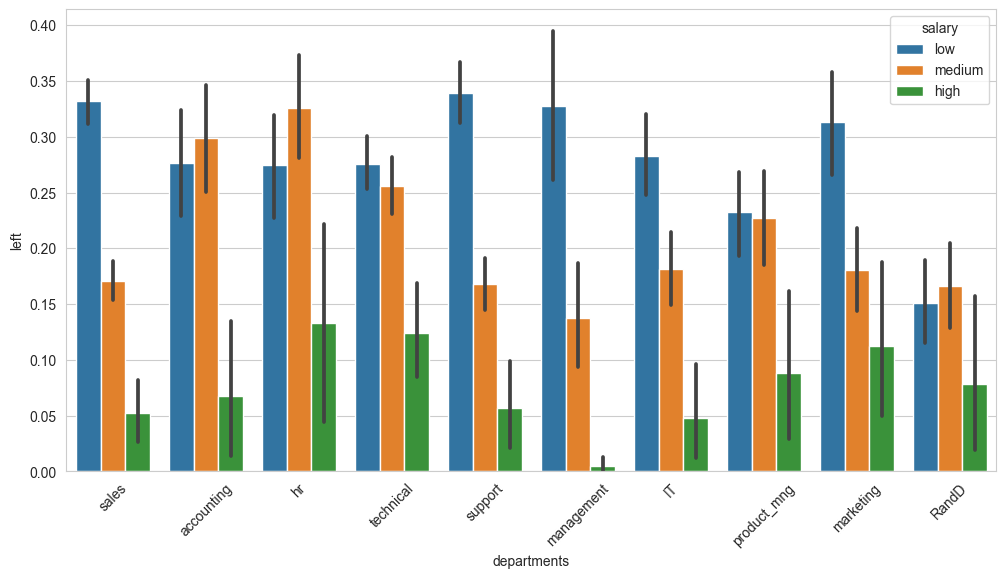

In [24]:
sns.barplot(x='departments', y="left", data=df, hue='salary')
plt.xticks(rotation=45)
plt.show()

In [25]:
for i in cat_list:
    print(df.groupby(i)["left"].mean())
    


departments
IT            0.222
RandD         0.154
accounting    0.266
hr            0.291
management    0.144
marketing     0.237
product_mng   0.220
sales         0.245
support       0.249
technical     0.256
Name: left, dtype: float64
work_accident
0   0.265
1   0.078
Name: left, dtype: float64
promotion_last_5years
0   0.242
1   0.060
Name: left, dtype: float64
salary
high     0.066
low      0.297
medium   0.204
Name: left, dtype: float64


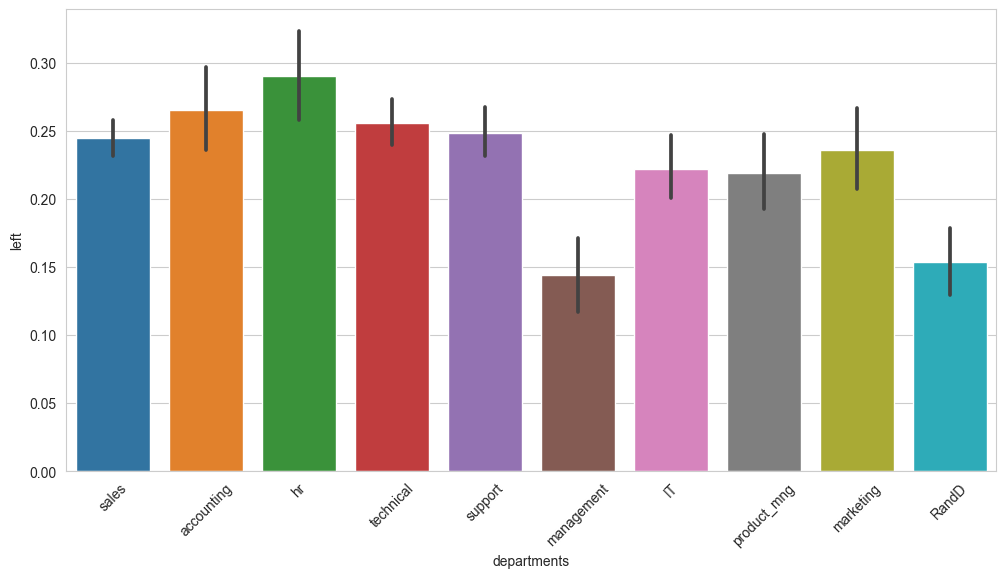

In [26]:
sns.barplot(x='departments', y="left", data=df)
plt.xticks(rotation=45)
plt.show()

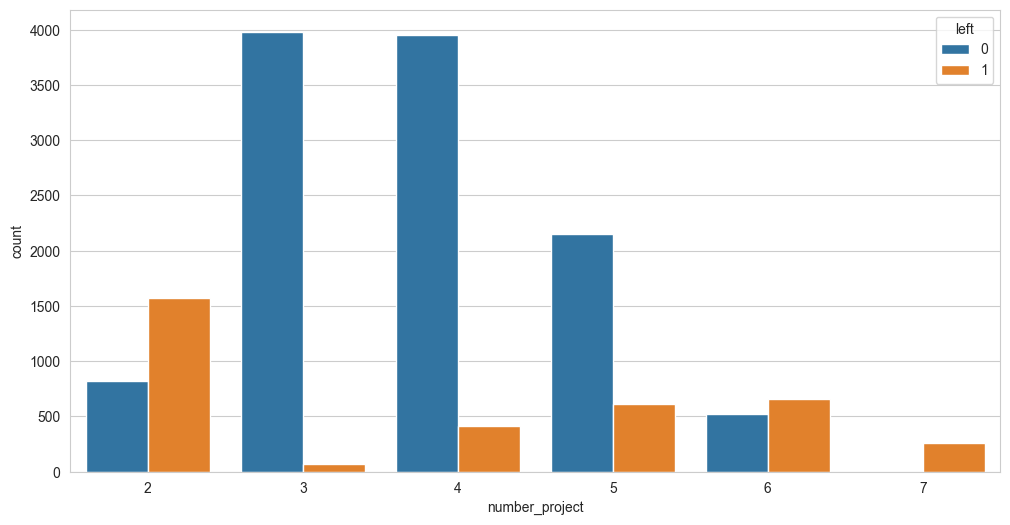

In [27]:
sns.countplot(x='number_project', data=df, hue='left');

<Axes: xlabel='departments', ylabel='count'>

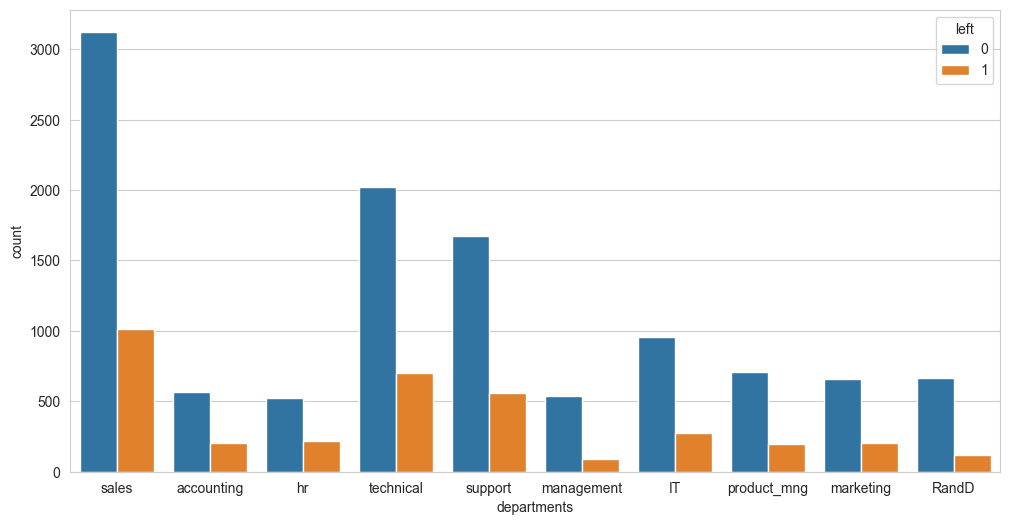

In [28]:
sns.countplot(x='departments', data=df, hue='left')

<Axes: xlabel='time_spend_company', ylabel='count'>

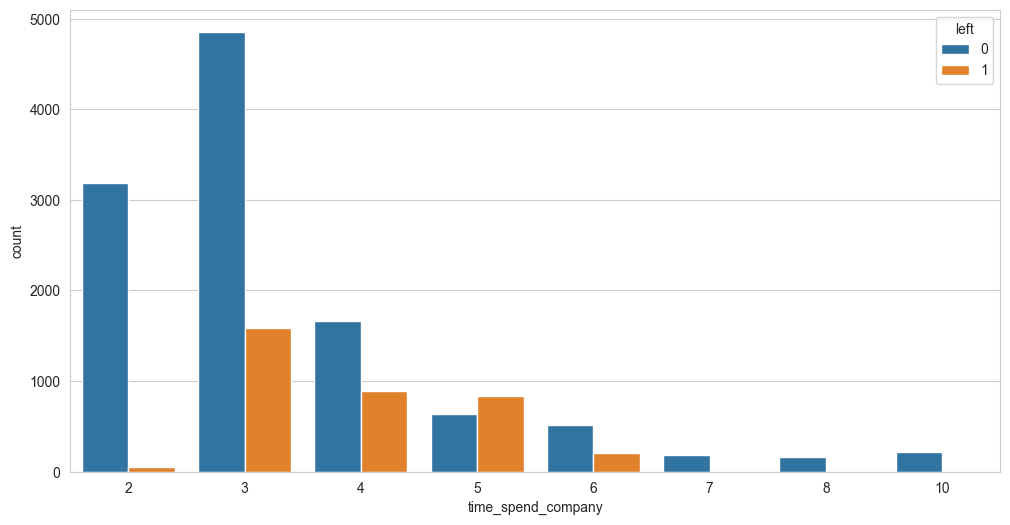

In [29]:
sns.countplot(x='time_spend_company', data=df, hue='left')

<Axes: xlabel='departments'>

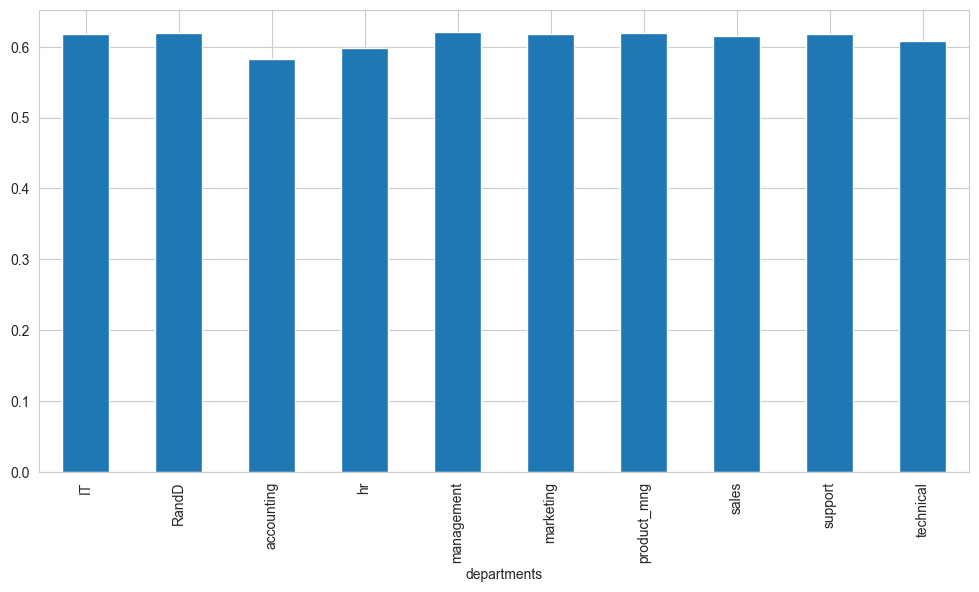

In [30]:
df.groupby('departments')["satisfaction_level"].mean().plot(kind="bar")

In [31]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

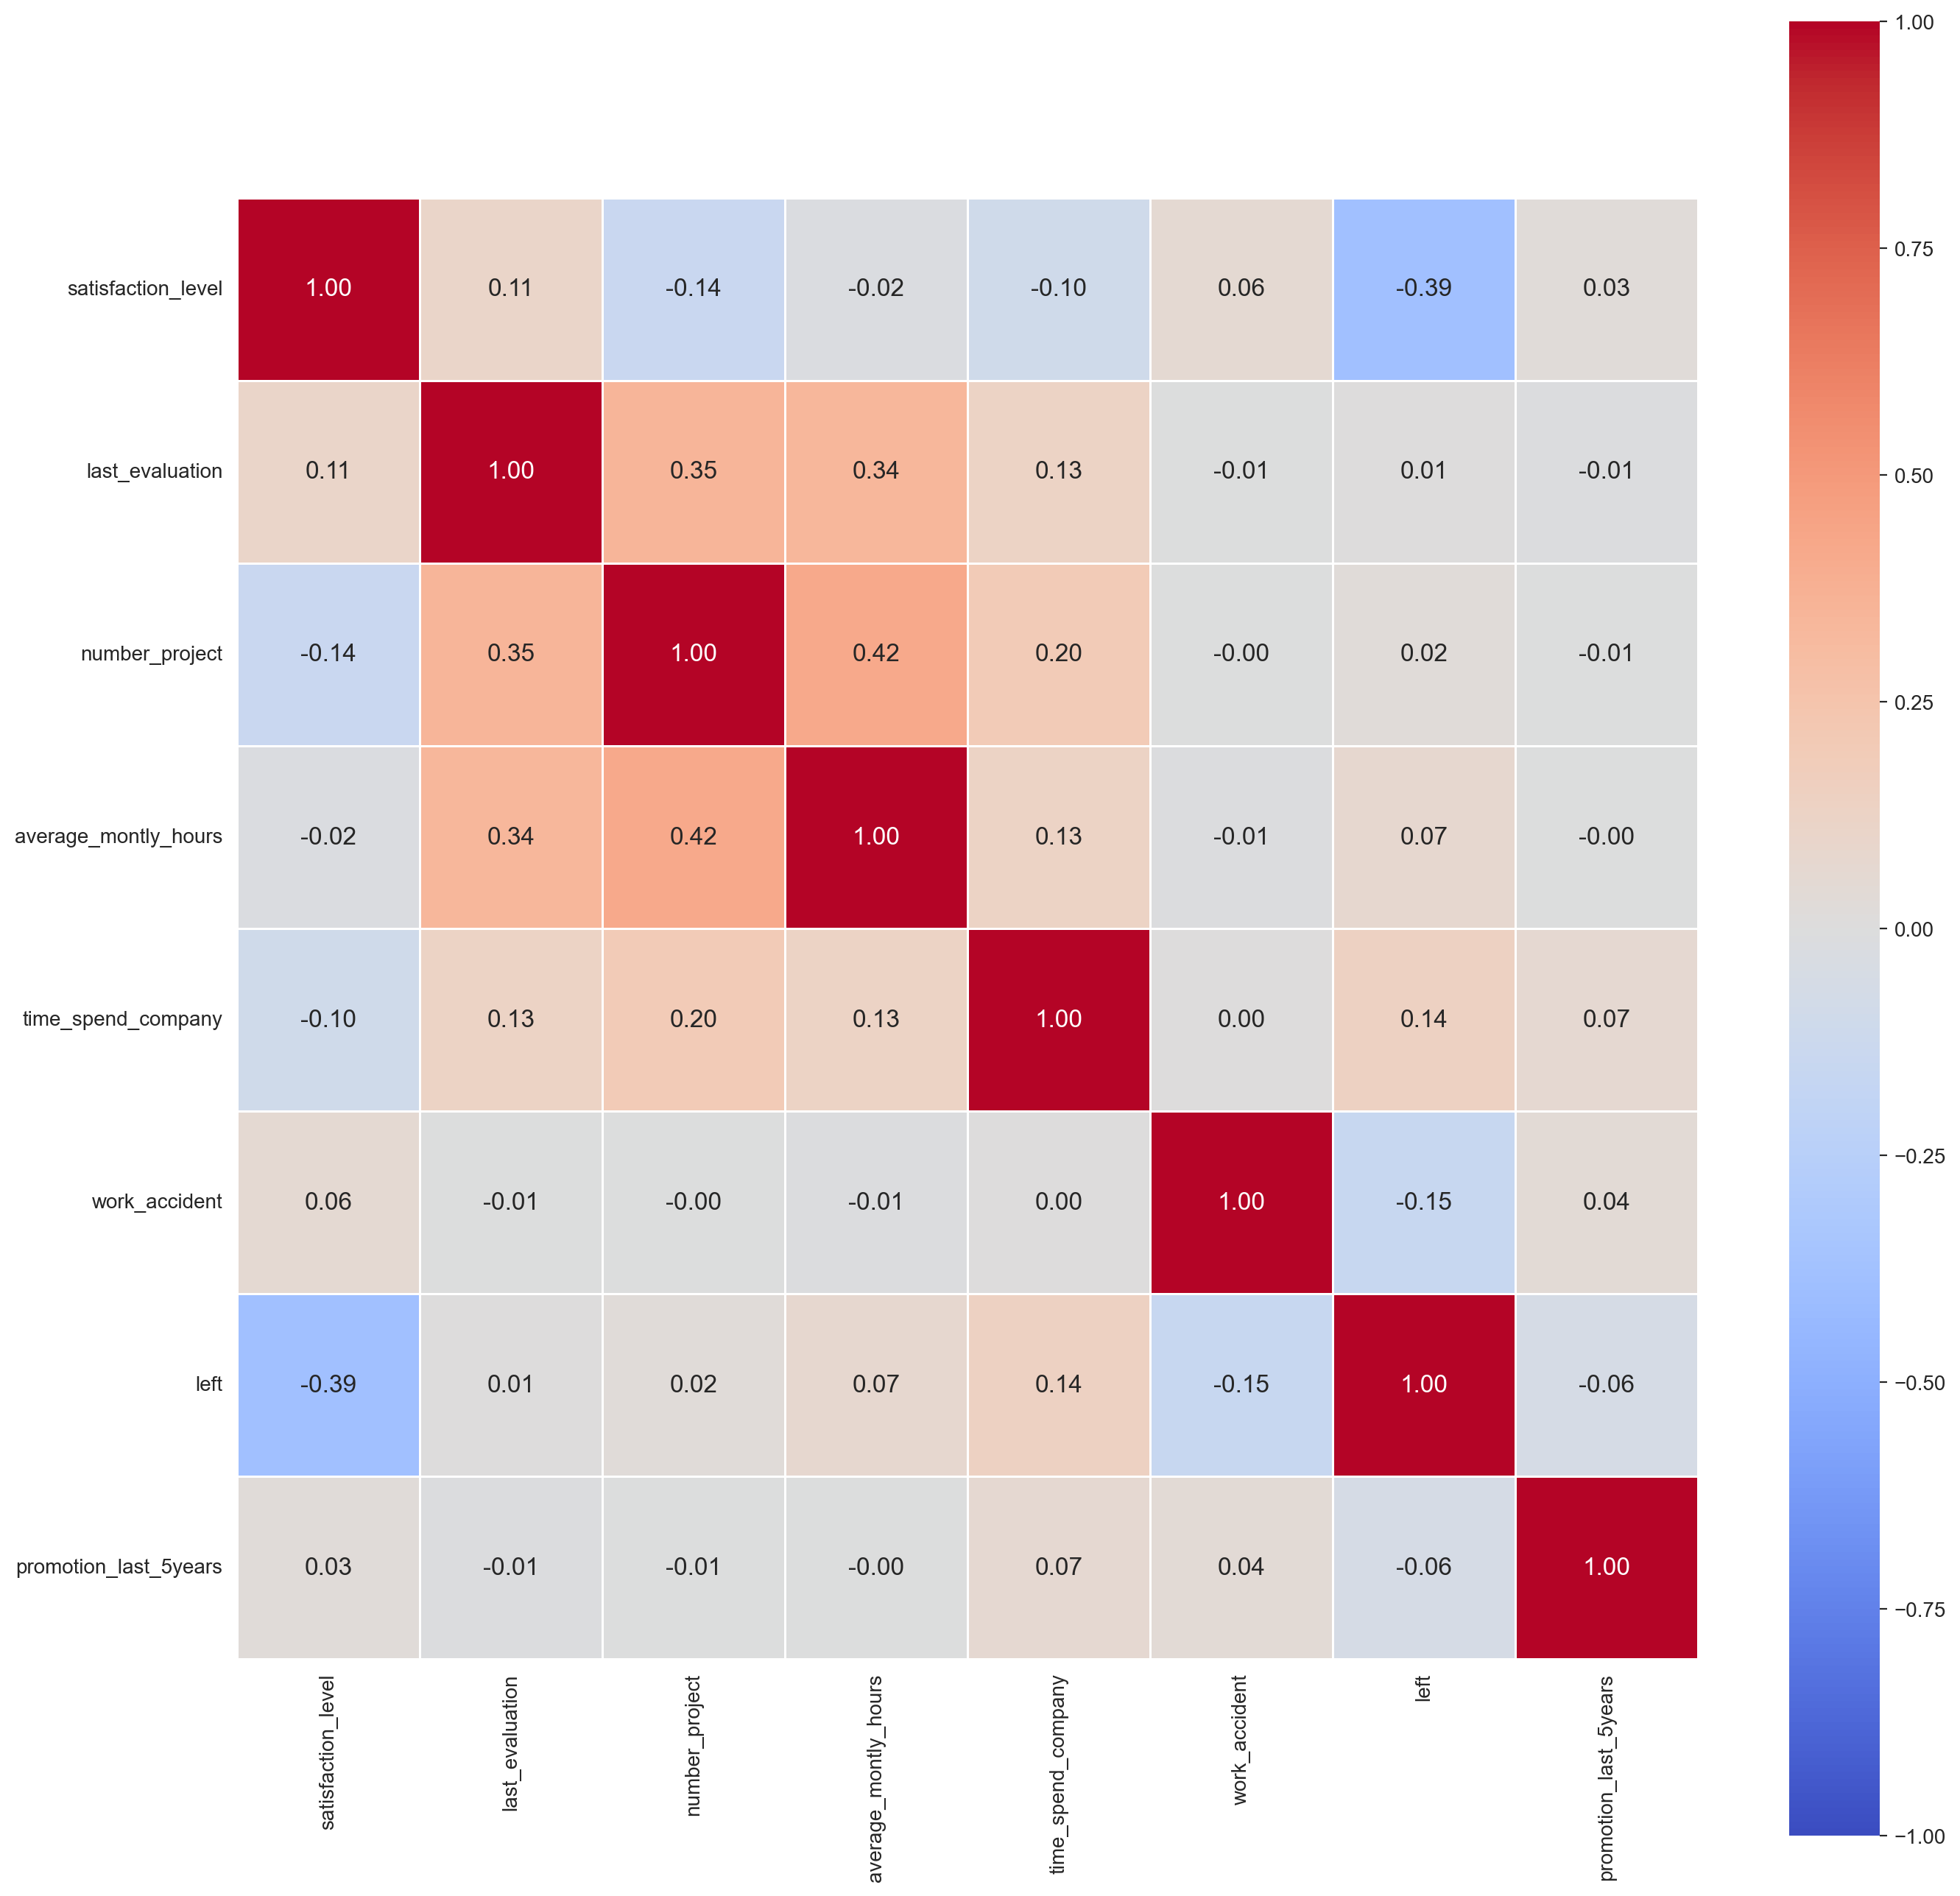

In [32]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm')


plt.show()

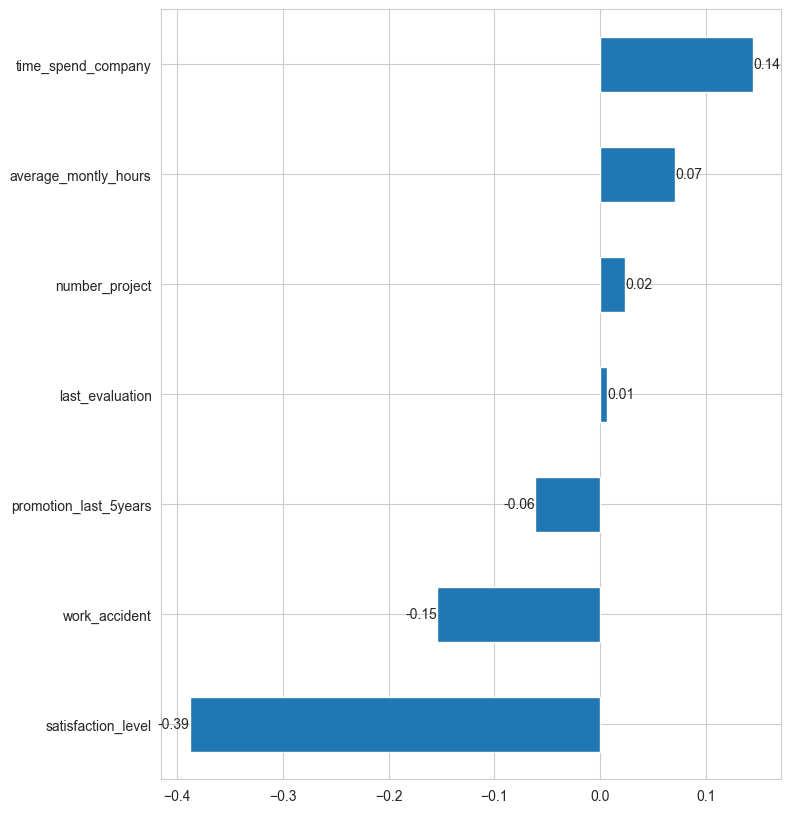

In [33]:
plt.figure(figsize=(8, 10))
ax=df.corr()["left"].sort_values().drop("left").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.show()

## 3. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.
- Don't try to use clustering algoritms for classfication.

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

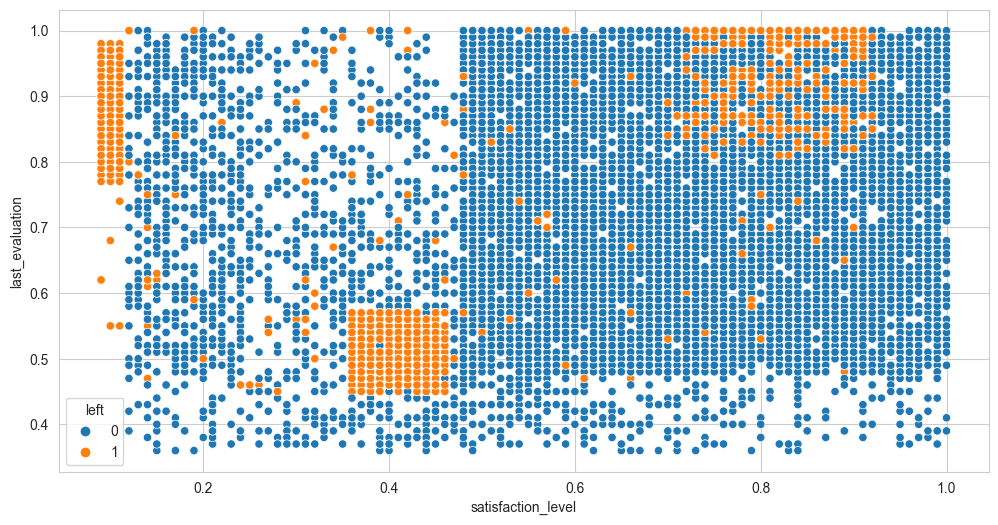

In [34]:
sns.scatterplot(x='satisfaction_level', y='last_evaluation', data = df, hue='left')

<div style="background-color:#3498DB; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;">There are 3 different clusters which are seen .</p>
</div>

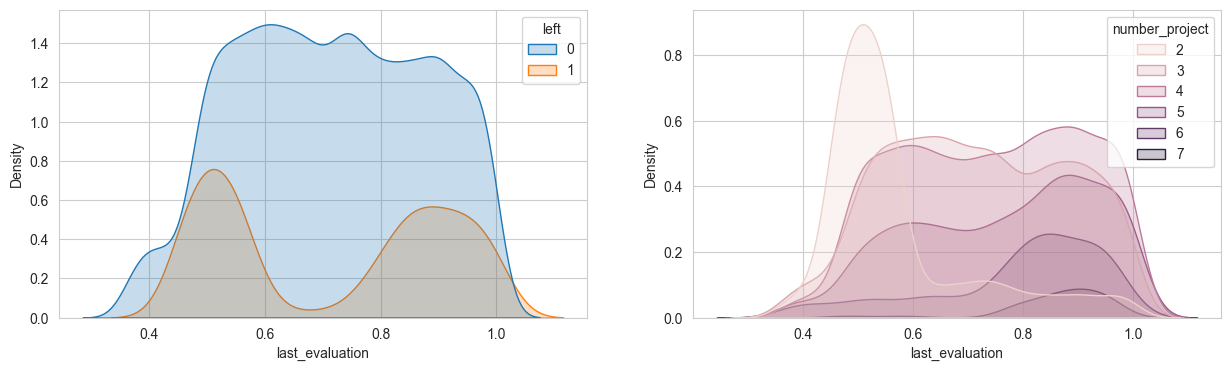

In [35]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.kdeplot(data = df, x='last_evaluation', hue='left', shade=True)

plt.subplot(122)
sns.kdeplot(data = df, x='last_evaluation', hue='number_project', shade=True)
plt.show()

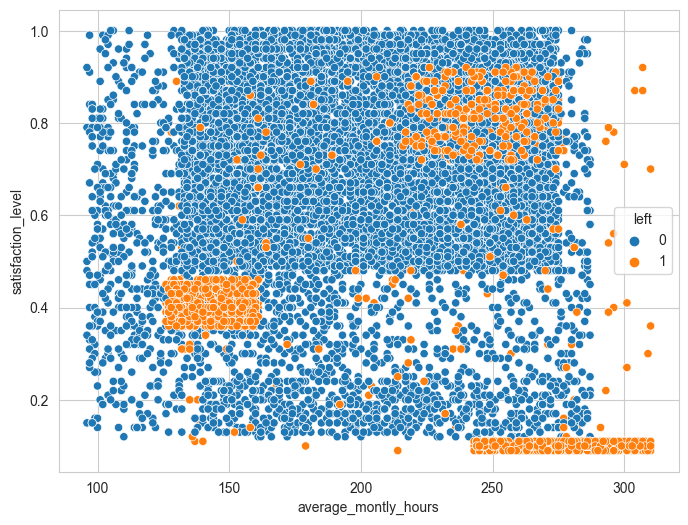

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x='average_montly_hours', y='satisfaction_level',hue='left');

<div style="background-color:#3498DB; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;">There are also 3 different clusters in different scatter plot .</p>
</div>

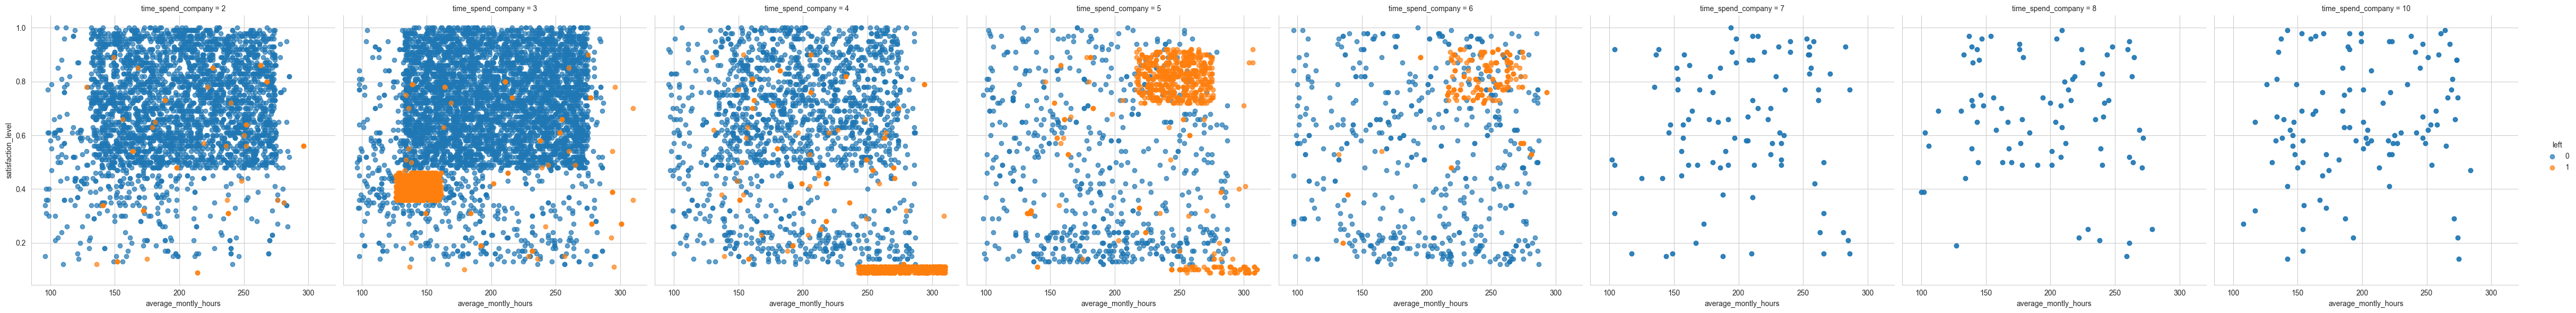

In [37]:
g=sns.FacetGrid(df,col='time_spend_company', hue='left',height=6)
g.map(plt.scatter, 'average_montly_hours', 'satisfaction_level', alpha=0.7)
g.add_legend();

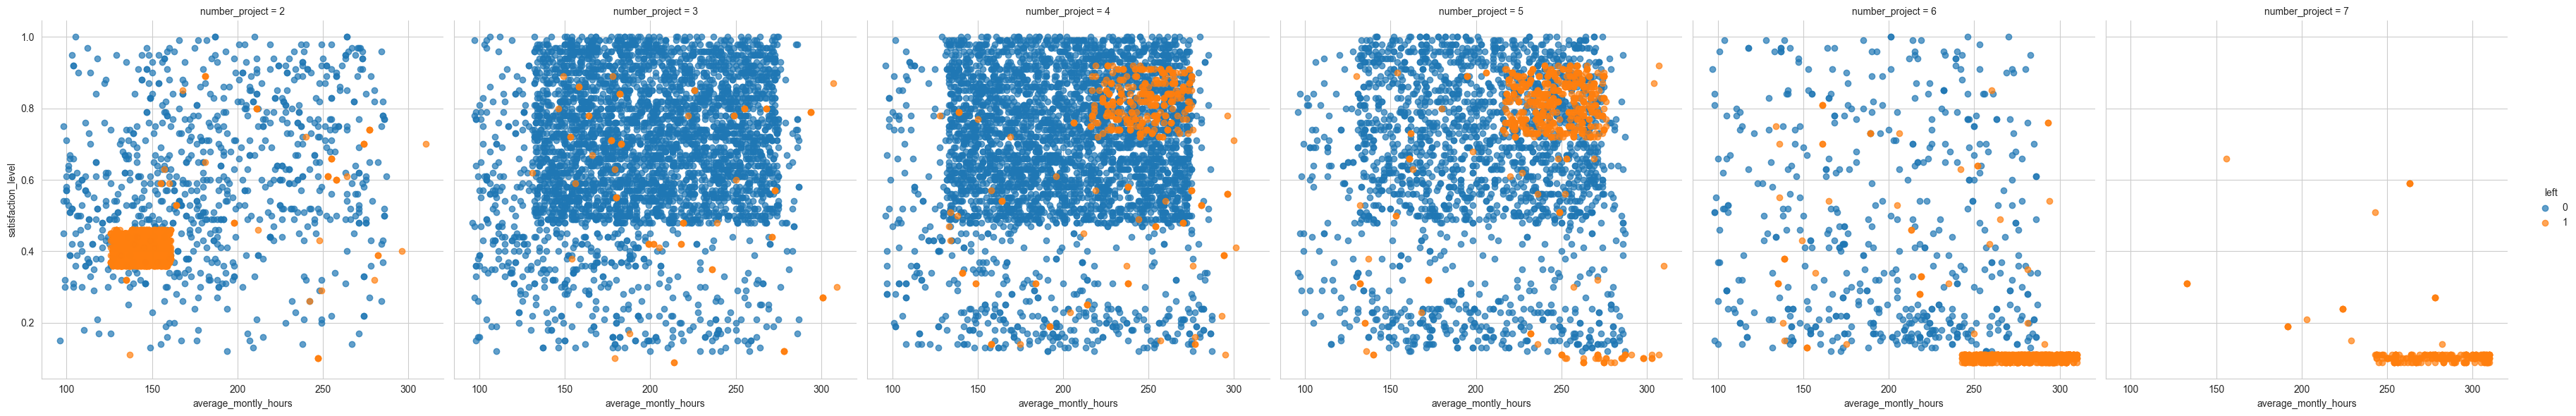

In [38]:
g=sns.FacetGrid(df,col='number_project', hue='left',height=6)
g.map(plt.scatter, 'average_montly_hours', 'satisfaction_level', alpha=0.7)
g.add_legend();


<div style="background-color:#3498DB; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;">number_project = 2 >> 1.cluster</p>
    <p style="font-weight: bold; color: white;">number_project = 4,5 >> 2.cluster</p>
    <p style="font-weight: bold; color: white;">number_project = 6,7 >> 3.cluster </p>
</div>

In [39]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [40]:
from sklearn.cluster import KMeans
# Filter data
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

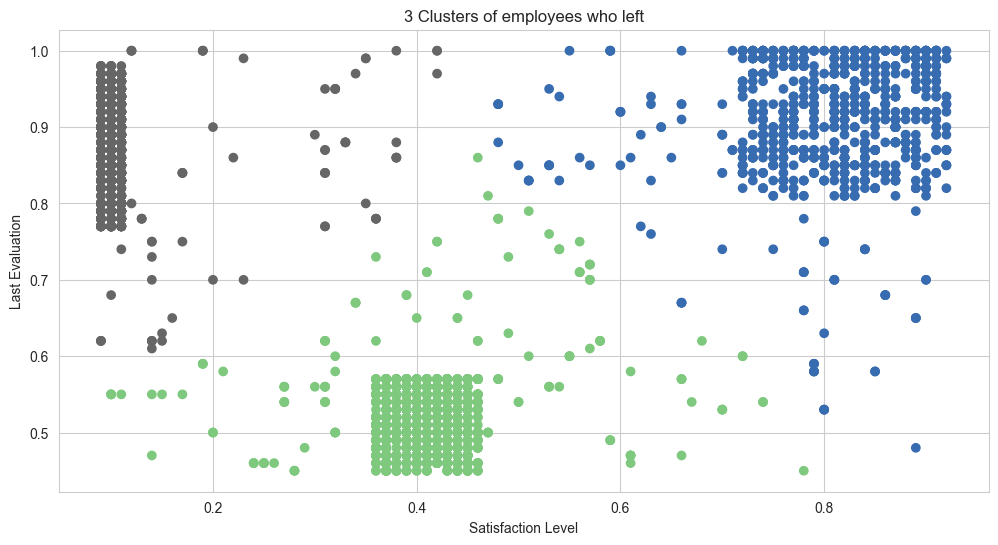

In [41]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(left_emp, left_emp['label'])

0.9163877837050199

In [44]:
hopkins(left_emp, 0.05)

0.9972781522601197

In [45]:
hopkins(left_emp, 1)

0.9972073175734406

In [46]:
left_emp_2 =  df[['satisfaction_level', 'average_montly_hours']][df.left == 1]
# Create groups using K-means clustering.
kmeans_2 = KMeans(n_clusters = 3, random_state = 0).fit(left_emp_2)

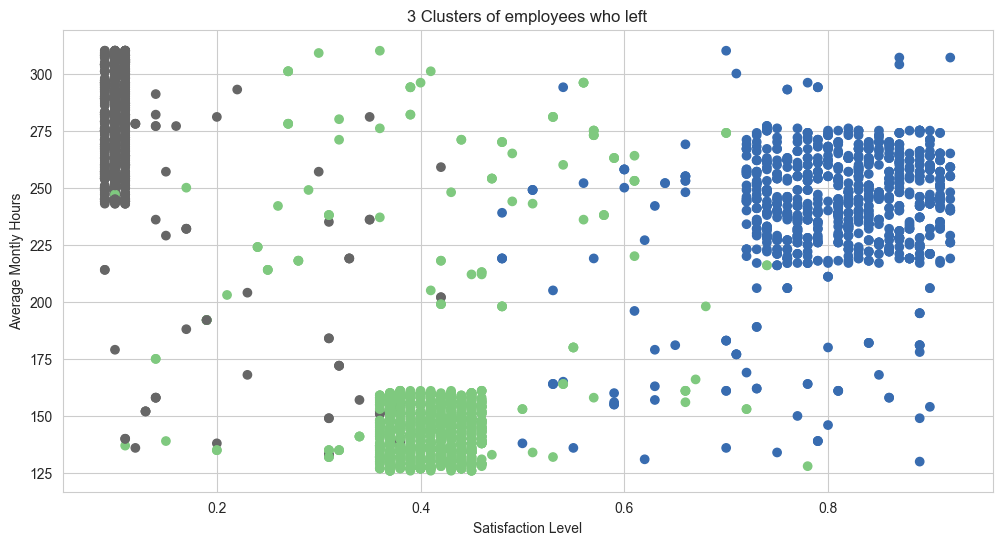

In [47]:
left_emp_2['label'] = kmeans_2.labels_
# Draw scatter plot
plt.scatter(left_emp_2['satisfaction_level'], left_emp_2['average_montly_hours'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Montly Hours')
plt.title('3 Clusters of employees who left')
plt.show()

## 4. Predictive Model Building

### 4.1. Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

### 4.2. Preprocessing

In [148]:
from sklearn.preprocessing import LabelEncoder
df['departments']=LabelEncoder().fit_transform(df[['departments']])
df['salary']=LabelEncoder().fit_transform(df[['salary']])

In [149]:
from sklearn.preprocessing import StandardScaler
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df),
                         columns=df.columns)


In [150]:
df.drop_duplicates(inplace=True)

In [151]:
X = df.drop('left', axis=1)
y = df['left'].values

In [152]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                   3              0                      0            7   
1                   6              0                      0            7   
2                   4              0                      0            7   
3                   5              0                      0            7   
4                   3              0                      0            7   

   salary  
0       1  
1       2  
2       2  
3       1  
4       1

In [153]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [154]:
X_train.head()

satisfaction_level  last_evaluation  number_project  \
8489               0.250            0.980               6   
3209               0.930            0.660               4   
2884               0.750            0.780               2   
6897               0.870            0.540               3   
6793               0.670            0.630               3   

      average_montly_hours  time_spend_company  work_accident  \
8489                   287                   5              1   
3209                   242                   4              0   
2884                   251                   6              0   
6897                   260                   2              0   
6793                   241                   3              0   

      promotion_last_5years  departments  salary  
8489                      0            7       1  
3209                      0            8       1  
2884                      0            9       2  
6897                      0            7       2  
6793                      0            5       2

In [155]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### 4.3. Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### 4.3.1. Model Building, Evaluating  and Tuning

# Gradient Boost

In [174]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [175]:
eval_metric(gb, X_train, y_train, X_test, y_test)

Test_Set
[[2974   27]
 [  42  555]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.95      0.93      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6959   40]
 [ 102 1292]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



In [158]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(gb,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1',
                                 'roc_auc'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.982
train_accuracy    0.983
test_precision    0.961
train_precision   0.969
test_recall       0.926
train_recall      0.928
test_f1           0.943
train_f1          0.948
test_roc_auc      0.987
train_roc_auc     0.990
dtype: float64

In [159]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1],
              'max_depth':[3,4,5,6]}

In [160]:
gb_model = GradientBoostingClassifier(random_state = 42)

In [161]:
grid = GridSearchCV(gb_model,
                    param_grid,
                    scoring = "f1",
                    verbose=2,
                    n_jobs=-1,
                    return_train_score=True)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 1]},
             return_train_score=True, scoring='f1', verbose=2)

In [162]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=6, max_features=4, random_state=42,
                           subsample=1)

In [163]:
pd.DataFrame(grid.cv_results_).loc[grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.950
mean_train_score   0.982
Name: 283, dtype: object

In [164]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score, roc_auc_score
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[2985   16]
 [  42  555]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.97      0.93      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6991    8]
 [  56 1338]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6999
           1       0.99      0.96      0.98      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.98      0.99      8393
weighted avg       0.99      0.99      0.99      8393



# Adaboost

In [165]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Since the default base_estimator DecisionTreeClassifier is in the background of Adoboost,
# we imported it to show how to play with the hyperparameters in it.
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [166]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [167]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [168]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[2940   61]
 [  61  536]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.90      0.90      0.90       597

    accuracy                           0.97      3598
   macro avg       0.94      0.94      0.94      3598
weighted avg       0.97      0.97      0.97      3598


Train_Set
[[6876  123]
 [ 150 1244]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.91      0.89      0.90      1394

    accuracy                           0.97      8393
   macro avg       0.94      0.94      0.94      8393
weighted avg       0.97      0.97      0.97      8393



In [169]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision",
                                 "recall",
                                 "f1"],
                       cv = 10,
                       return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.966
train_accuracy    0.967
test_precision    0.911
train_precision   0.913
test_recall       0.882
train_recall      0.886
test_f1           0.896
train_f1          0.899
dtype: float64

In [170]:
model = AdaBoostClassifier(random_state=42)

In [171]:
param_grid = {"n_estimators": [20, 30, 100, 200],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [172]:
ada_grid_model = GridSearchCV(model,
                              param_grid,
                              cv=5,
                              scoring='f1',
                              return_train_score=True)

In [173]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 100, 200]},
             return_train_score=True, scoring='f1')

In [73]:
ada_grid_model.best_estimator_

AdaBoostClassifier(n_estimators=200, random_state=42)

In [74]:
pd.DataFrame(ada_grid_model.cv_results_).loc[ada_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.916
mean_train_score   0.920
Name: 19, dtype: object

In [75]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[3329  100]
 [  87  984]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3429
           1       0.91      0.92      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500


Train_Set
[[7809  190]
 [ 202 2298]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7999
           1       0.92      0.92      0.92      2500

    accuracy                           0.96     10499
   macro avg       0.95      0.95      0.95     10499
weighted avg       0.96      0.96      0.96     10499



In [76]:
from sklearn.metrics import roc_auc_score,\
                            RocCurveDisplay, PrecisionRecallDisplay

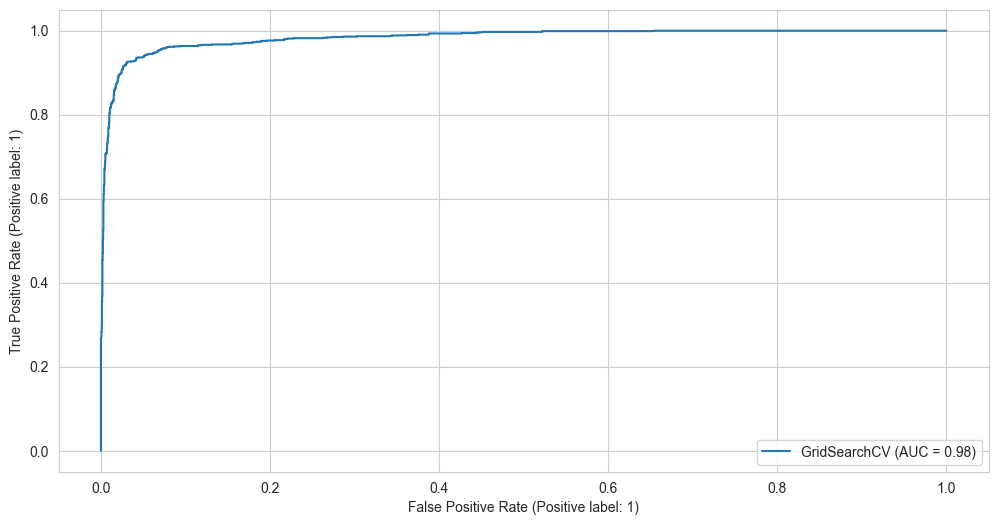

In [77]:
RocCurveDisplay.from_estimator(ada_grid_model, X_test, y_test);

# XGboost

In [78]:
from xgboost import XGBClassifier

In [79]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[3406   23]
 [  39 1032]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7993    6]
 [  15 2485]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.99      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [81]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1',
                                 'roc_auc'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.987
train_accuracy    0.998
test_precision    0.981
train_precision   0.998
test_recall       0.964
train_recall      0.995
test_f1           0.972
train_f1          0.996
test_roc_auc      0.994
train_roc_auc     1.000
dtype: float64

In [82]:
param_grid = {"n_estimators":[50, 100, 200],
              'max_depth':[3,4,5],
              "learning_rate": [0.1, 0.2],
              "subsample":[0.5, 0.8, 1],
              "colsample_bytree":[0.5,0.7, 1]}

In [83]:
xgb_model = XGBClassifier(random_state=42)

In [84]:
xgb_grid = GridSearchCV(xgb_model,
                        param_grid,
                        scoring="f1",
                        verbose=2,
                        n_jobs=-1,
                        return_train_score=True)

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='f1', verbose=2)

In [85]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [86]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [87]:
pd.DataFrame(xgb_grid.cv_results_).loc[xgb_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.973
mean_train_score   0.997
Name: 160, dtype: object

In [88]:
y_pred = xgb_grid.predict(X_test)
y_pred_proba = xgb_grid.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3406   23]
 [  37 1034]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3429
           1       0.98      0.97      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7994    5]
 [  12 2488]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



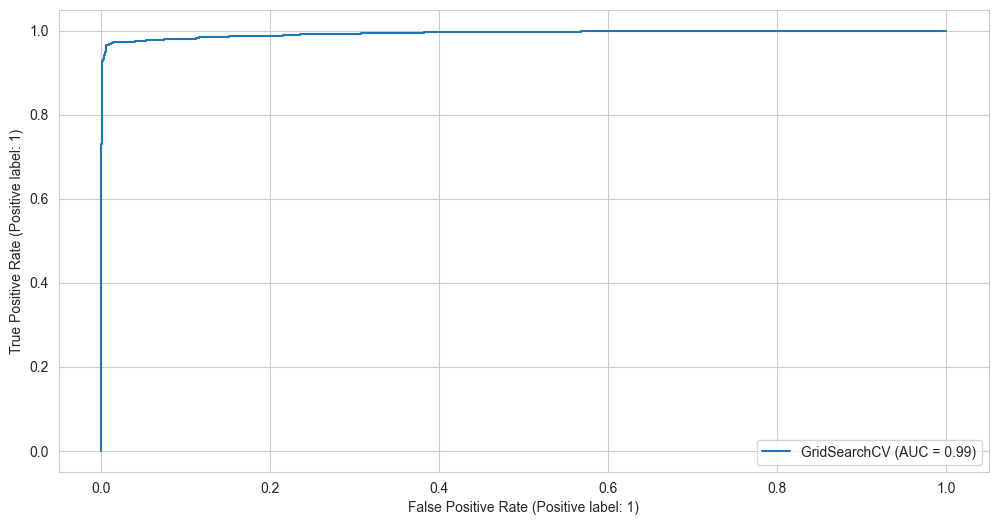

In [89]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log_model = LogisticRegression(class_weight="balanced")
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2556  873]
 [ 249  822]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      3429
           1       0.48      0.77      0.59      1071

    accuracy                           0.75      4500
   macro avg       0.70      0.76      0.71      4500
weighted avg       0.81      0.75      0.77      4500



# Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
eval_metric(rfc, X_train, y_train, X_test, y_test)

Test_Set
[[3422    7]
 [  34 1037]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7999    0]
 [   0 2500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [99]:
model =  RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1',
                                 'roc_auc'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.991
train_accuracy    1.000
test_precision    0.993
train_precision   1.000
test_recall       0.968
train_recall      1.000
test_f1           0.980
train_f1          1.000
test_roc_auc      0.993
train_roc_auc     1.000
dtype: float64

In [108]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [109]:
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [110]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 200,
 'n_estimators': 50}

In [111]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, max_features=0.8, max_leaf_nodes=200,
                       n_estimators=50)

In [121]:
y_pred = rf_grid.predict(X_test)
y_pred_proba = rf_grid.predict_proba(X_test)

rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(rf_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3418   11]
 [  70 1001]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3429
           1       0.99      0.93      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500


Train_Set
[[7986   13]
 [ 150 2350]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7999
           1       0.99      0.94      0.97      2500

    accuracy                           0.98     10499
   macro avg       0.99      0.97      0.98     10499
weighted avg       0.98      0.98      0.98     10499



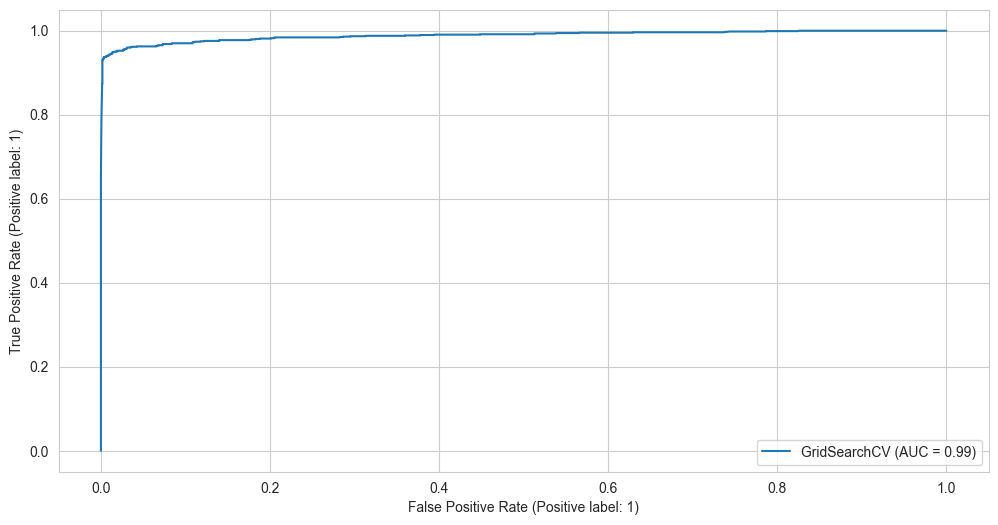

In [122]:
RocCurveDisplay.from_estimator(rf_grid, X_test, y_test);

# Deep Learning

In [128]:
X_train.shape

(10499, 9)

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

In [131]:
deep_model = Sequential()

deep_model.add(Dense(14, activation="relu", input_dim=X_train.shape[1]))
deep_model.add(Dense(7, activation="relu"))
deep_model.add(Dense(1, activation="sigmoid"))

deep_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [132]:
deep_model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
296/296 [==============================] - 1s 2ms/step - loss: 1.6409 - recall: 0.1376 - val_loss: 0.5615 - val_recall: 0.0115
Epoch 2/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5295 - recall: 0.0197 - val_loss: 0.5218 - val_recall: 0.0000e+00
Epoch 3/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5043 - recall: 0.0237 - val_loss: 0.5265 - val_recall: 0.0000e+00
Epoch 4/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.4851 - recall: 0.0496 - val_loss: 0.4917 - val_recall: 0.2261
Epoch 5/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.4703 - recall: 0.1005 - val_loss: 0.5289 - val_recall: 0.0000e+00
Epoch 6/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.4652 - recall: 0.1425 - val_loss: 0.4539 - val_recall: 0.0766
Epoch 7/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.4517 - recall: 0.2019 - val_loss: 0.4508 - val_recall: 0.0153
Epoch 8/

296/296 [==============================] - 0s 1ms/step - loss: 0.3723 - recall: 0.5109 - val_loss: 0.3856 - val_recall: 0.5211
Epoch 60/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3780 - recall: 0.5181 - val_loss: 0.3738 - val_recall: 0.4904
Epoch 61/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3722 - recall: 0.5275 - val_loss: 0.3722 - val_recall: 0.4559
Epoch 62/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3760 - recall: 0.5167 - val_loss: 0.3849 - val_recall: 0.4215
Epoch 63/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3738 - recall: 0.5257 - val_loss: 0.4310 - val_recall: 0.3142
Epoch 64/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.3671 - recall: 0.5288 - val_loss: 0.3773 - val_recall: 0.6513
Epoch 65/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3695 - recall: 0.5221 - val_loss: 0.4038 - val_recall: 0.3831
Epoch 66/1000
296/296 [====

296/296 [==============================] - 0s 1ms/step - loss: 0.3485 - recall: 0.5860 - val_loss: 0.4030 - val_recall: 0.3640
Epoch 118/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3442 - recall: 0.5958 - val_loss: 0.3581 - val_recall: 0.4713
Epoch 119/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3427 - recall: 0.5931 - val_loss: 0.3802 - val_recall: 0.4176
Epoch 120/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3399 - recall: 0.5976 - val_loss: 0.3685 - val_recall: 0.8123
Epoch 121/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3352 - recall: 0.5958 - val_loss: 0.3629 - val_recall: 0.7701
Epoch 122/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3421 - recall: 0.5989 - val_loss: 0.3414 - val_recall: 0.5670
Epoch 123/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.3368 - recall: 0.6043 - val_loss: 0.3511 - val_recall: 0.7050
Epoch 124/1000
296/29

Epoch 175/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2079 - recall: 0.8696 - val_loss: 0.2852 - val_recall: 0.6820
Epoch 176/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2006 - recall: 0.8682 - val_loss: 0.2212 - val_recall: 0.8851
Epoch 177/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2014 - recall: 0.8674 - val_loss: 0.2315 - val_recall: 0.8851
Epoch 178/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2043 - recall: 0.8647 - val_loss: 0.2169 - val_recall: 0.8851
Epoch 179/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2123 - recall: 0.8611 - val_loss: 0.2280 - val_recall: 0.8429
Epoch 180/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2051 - recall: 0.8665 - val_loss: 0.2340 - val_recall: 0.7701
Epoch 181/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1968 - recall: 0.8745 - val_loss: 0.2092 - val_recall: 0.8352
Epoch 

Epoch 233/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1858 - recall: 0.8906 - val_loss: 0.2389 - val_recall: 0.9042
Epoch 234/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1896 - recall: 0.8874 - val_loss: 0.2092 - val_recall: 0.8199
Epoch 235/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1772 - recall: 0.8982 - val_loss: 0.2538 - val_recall: 0.7318
Epoch 236/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1820 - recall: 0.8870 - val_loss: 0.1950 - val_recall: 0.8966
Epoch 237/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1819 - recall: 0.8968 - val_loss: 0.2267 - val_recall: 0.8582
Epoch 238/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1820 - recall: 0.8897 - val_loss: 0.2204 - val_recall: 0.8046
Epoch 239/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1847 - recall: 0.8861 - val_loss: 0.1980 - val_recall: 0.8966
Epoch 

Epoch 291/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1709 - recall: 0.8950 - val_loss: 0.1913 - val_recall: 0.8966
Epoch 292/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1762 - recall: 0.8910 - val_loss: 0.1878 - val_recall: 0.8966
Epoch 293/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1762 - recall: 0.8924 - val_loss: 0.1892 - val_recall: 0.8851
Epoch 294/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1730 - recall: 0.8973 - val_loss: 0.2083 - val_recall: 0.9004
Epoch 295/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1726 - recall: 0.9000 - val_loss: 0.2172 - val_recall: 0.8544
Epoch 296/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1733 - recall: 0.8950 - val_loss: 0.2060 - val_recall: 0.8736
Epoch 297/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1721 - recall: 0.8941 - val_loss: 0.1947 - val_recall: 0.9042
Epoch 

Epoch 349/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1717 - recall: 0.8888 - val_loss: 0.2200 - val_recall: 0.8008
Epoch 350/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1624 - recall: 0.8982 - val_loss: 0.1890 - val_recall: 0.8966
Epoch 351/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1636 - recall: 0.9017 - val_loss: 0.1788 - val_recall: 0.8927
Epoch 352/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1740 - recall: 0.8839 - val_loss: 0.1738 - val_recall: 0.8966
Epoch 353/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1655 - recall: 0.8937 - val_loss: 0.1939 - val_recall: 0.9080
Epoch 354/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1661 - recall: 0.8968 - val_loss: 0.1923 - val_recall: 0.8314
Epoch 355/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1662 - recall: 0.8950 - val_loss: 0.1797 - val_recall: 0.9004
Epoch 

Epoch 407/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1586 - recall: 0.8991 - val_loss: 0.1979 - val_recall: 0.8123
Epoch 408/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1605 - recall: 0.8937 - val_loss: 0.1904 - val_recall: 0.8352
Epoch 409/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1607 - recall: 0.8986 - val_loss: 0.1681 - val_recall: 0.8812
Epoch 410/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1640 - recall: 0.8910 - val_loss: 0.1710 - val_recall: 0.8736
Epoch 411/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1608 - recall: 0.8955 - val_loss: 0.1780 - val_recall: 0.8851
Epoch 412/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1563 - recall: 0.8977 - val_loss: 0.1923 - val_recall: 0.8812
Epoch 413/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1554 - recall: 0.9053 - val_loss: 0.1657 - val_recall: 0.8851
Epoch 

Epoch 465/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1509 - recall: 0.9022 - val_loss: 0.1699 - val_recall: 0.8889
Epoch 466/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1529 - recall: 0.9026 - val_loss: 0.1666 - val_recall: 0.8621
Epoch 467/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1480 - recall: 0.9062 - val_loss: 0.1618 - val_recall: 0.8851
Epoch 468/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1615 - recall: 0.8919 - val_loss: 0.2189 - val_recall: 0.7625
Epoch 469/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1489 - recall: 0.9053 - val_loss: 0.1779 - val_recall: 0.8966
Epoch 470/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1483 - recall: 0.9071 - val_loss: 0.2201 - val_recall: 0.7471
Epoch 471/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1537 - recall: 0.8973 - val_loss: 0.1953 - val_recall: 0.9042
Epoch 

Epoch 523/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1467 - recall: 0.9049 - val_loss: 0.1597 - val_recall: 0.8851
Epoch 524/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1507 - recall: 0.9004 - val_loss: 0.1774 - val_recall: 0.8851
Epoch 525/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1510 - recall: 0.9008 - val_loss: 0.1672 - val_recall: 0.8851
Epoch 526/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1438 - recall: 0.9071 - val_loss: 0.1722 - val_recall: 0.8697
Epoch 527/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1474 - recall: 0.9044 - val_loss: 0.1730 - val_recall: 0.8621
Epoch 528/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1477 - recall: 0.9031 - val_loss: 0.1675 - val_recall: 0.8927
Epoch 529/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1446 - recall: 0.9049 - val_loss: 0.1595 - val_recall: 0.8927
Epoch 

Epoch 581/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1420 - recall: 0.9071 - val_loss: 0.1618 - val_recall: 0.8927
Epoch 582/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1457 - recall: 0.9058 - val_loss: 0.1576 - val_recall: 0.8812
Epoch 583/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1446 - recall: 0.8995 - val_loss: 0.1551 - val_recall: 0.8927
Epoch 584/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1435 - recall: 0.9031 - val_loss: 0.1872 - val_recall: 0.8467
Epoch 585/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1478 - recall: 0.9008 - val_loss: 0.1583 - val_recall: 0.8927
Epoch 586/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1433 - recall: 0.9075 - val_loss: 0.1571 - val_recall: 0.8927
Epoch 587/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1495 - recall: 0.9004 - val_loss: 0.1577 - val_recall: 0.8927
Epoch 

Epoch 639/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1440 - recall: 0.9035 - val_loss: 0.1611 - val_recall: 0.8966
Epoch 640/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1448 - recall: 0.9089 - val_loss: 0.1556 - val_recall: 0.8812
Epoch 641/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1397 - recall: 0.9080 - val_loss: 0.1621 - val_recall: 0.8697
Epoch 642/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1402 - recall: 0.9080 - val_loss: 0.1540 - val_recall: 0.8927
Epoch 643/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1423 - recall: 0.9040 - val_loss: 0.1597 - val_recall: 0.8889
Epoch 644/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1394 - recall: 0.9093 - val_loss: 0.1586 - val_recall: 0.8927
Epoch 645/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1415 - recall: 0.9062 - val_loss: 0.1579 - val_recall: 0.8927
Epoch 

Epoch 697/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1446 - recall: 0.9040 - val_loss: 0.1634 - val_recall: 0.8774
Epoch 698/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1414 - recall: 0.9071 - val_loss: 0.1533 - val_recall: 0.8966
Epoch 699/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1403 - recall: 0.9067 - val_loss: 0.1832 - val_recall: 0.8352
Epoch 700/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1374 - recall: 0.9084 - val_loss: 0.1519 - val_recall: 0.8927
Epoch 701/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1383 - recall: 0.9071 - val_loss: 0.1624 - val_recall: 0.8736
Epoch 702/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1405 - recall: 0.9089 - val_loss: 0.1574 - val_recall: 0.8927
Epoch 703/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1382 - recall: 0.9075 - val_loss: 0.1592 - val_recall: 0.8927
Epoch 

Epoch 755/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1341 - recall: 0.9093 - val_loss: 0.1555 - val_recall: 0.8927
Epoch 756/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1391 - recall: 0.9058 - val_loss: 0.2144 - val_recall: 0.7356
Epoch 757/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1413 - recall: 0.9031 - val_loss: 0.1609 - val_recall: 0.8927
Epoch 758/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1384 - recall: 0.9000 - val_loss: 0.1562 - val_recall: 0.8812
Epoch 759/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1386 - recall: 0.9022 - val_loss: 0.1497 - val_recall: 0.8812
Epoch 760/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1374 - recall: 0.9062 - val_loss: 0.1516 - val_recall: 0.8966
Epoch 761/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1376 - recall: 0.9017 - val_loss: 0.1701 - val_recall: 0.9004
Epoch 

Epoch 813/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1368 - recall: 0.9062 - val_loss: 0.1506 - val_recall: 0.8927
Epoch 814/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1358 - recall: 0.9035 - val_loss: 0.1469 - val_recall: 0.8927
Epoch 815/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1443 - recall: 0.8950 - val_loss: 0.1530 - val_recall: 0.8927
Epoch 816/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1377 - recall: 0.9044 - val_loss: 0.1511 - val_recall: 0.8927
Epoch 817/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1345 - recall: 0.9058 - val_loss: 0.1496 - val_recall: 0.8927
Epoch 818/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1374 - recall: 0.9040 - val_loss: 0.1508 - val_recall: 0.8927
Epoch 819/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1410 - recall: 0.8982 - val_loss: 0.1556 - val_recall: 0.8659
Epoch 

Epoch 871/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1341 - recall: 0.9071 - val_loss: 0.1574 - val_recall: 0.8966
Epoch 872/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1326 - recall: 0.9071 - val_loss: 0.1630 - val_recall: 0.8582
Epoch 873/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1372 - recall: 0.9013 - val_loss: 0.1528 - val_recall: 0.8774
Epoch 874/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1392 - recall: 0.8995 - val_loss: 0.1512 - val_recall: 0.8927
Epoch 875/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1317 - recall: 0.9080 - val_loss: 0.1503 - val_recall: 0.8927
Epoch 876/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1359 - recall: 0.9008 - val_loss: 0.1589 - val_recall: 0.8889
Epoch 877/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1391 - recall: 0.8986 - val_loss: 0.1466 - val_recall: 0.8927
Epoch 

Epoch 929/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1321 - recall: 0.9049 - val_loss: 0.1555 - val_recall: 0.8966
Epoch 930/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1295 - recall: 0.9084 - val_loss: 0.1458 - val_recall: 0.8736
Epoch 931/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.1340 - recall: 0.8995 - val_loss: 0.1480 - val_recall: 0.8966
Epoch 932/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1330 - recall: 0.9044 - val_loss: 0.2033 - val_recall: 0.7471
Epoch 933/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1312 - recall: 0.9026 - val_loss: 0.1413 - val_recall: 0.8927
Epoch 934/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1303 - recall: 0.9089 - val_loss: 0.1531 - val_recall: 0.8697
Epoch 935/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1326 - recall: 0.9084 - val_loss: 0.1592 - val_recall: 0.8736
Epoch 

Epoch 987/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1349 - recall: 0.9053 - val_loss: 0.1586 - val_recall: 0.8659
Epoch 988/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1305 - recall: 0.9040 - val_loss: 0.1547 - val_recall: 0.8889
Epoch 989/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1286 - recall: 0.9071 - val_loss: 0.1515 - val_recall: 0.8889
Epoch 990/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1368 - recall: 0.9013 - val_loss: 0.1610 - val_recall: 0.8506
Epoch 991/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1279 - recall: 0.9062 - val_loss: 0.1485 - val_recall: 0.8736
Epoch 992/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1323 - recall: 0.9004 - val_loss: 0.1492 - val_recall: 0.8966
Epoch 993/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1340 - recall: 0.9058 - val_loss: 0.2295 - val_recall: 0.6935
Epoch 

In [133]:
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                140       
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 253 (1012.00 Byte)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
loss_df = pd.DataFrame(deep_model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 1.641   0.138     0.562       0.011
1 0.529   0.020     0.522       0.000
2 0.504   0.024     0.526       0.000
3 0.485   0.050     0.492       0.226
4 0.470   0.100     0.529       0.000

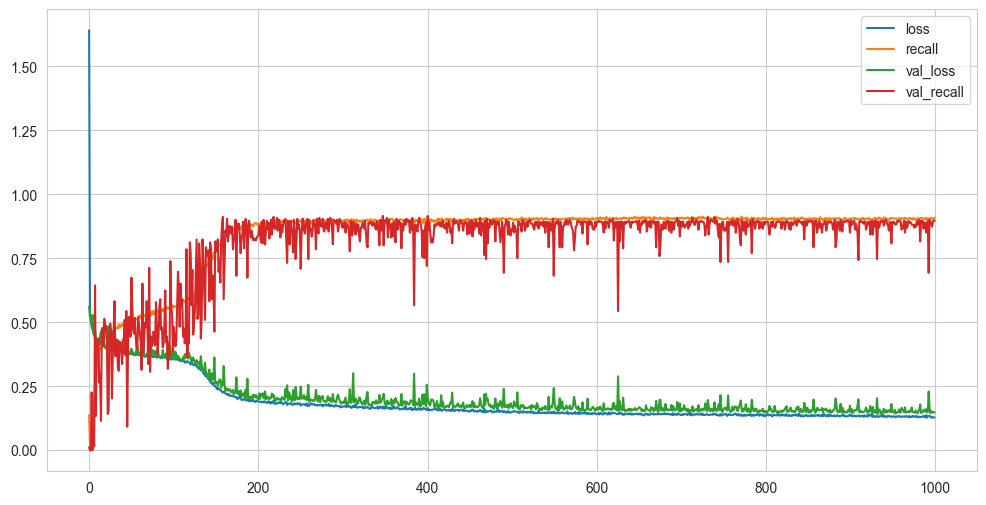

In [135]:
loss_df.plot()
plt.show()

In [136]:
deep_model.evaluate(X_test, y_test, verbose=0)

[0.13367155194282532, 0.9178338050842285]

In [138]:
y_pred = deep_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

141/141 [==============================] - 0s 857us/step
[[3331   98]
 [  88  983]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3429
           1       0.91      0.92      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [142]:
X_train.shape

(10499, 9)

##### 4.3.1.1 Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

#### 4.3.2. Compare Models Performances
- Compare model performances according to metrics you choose for the problem.

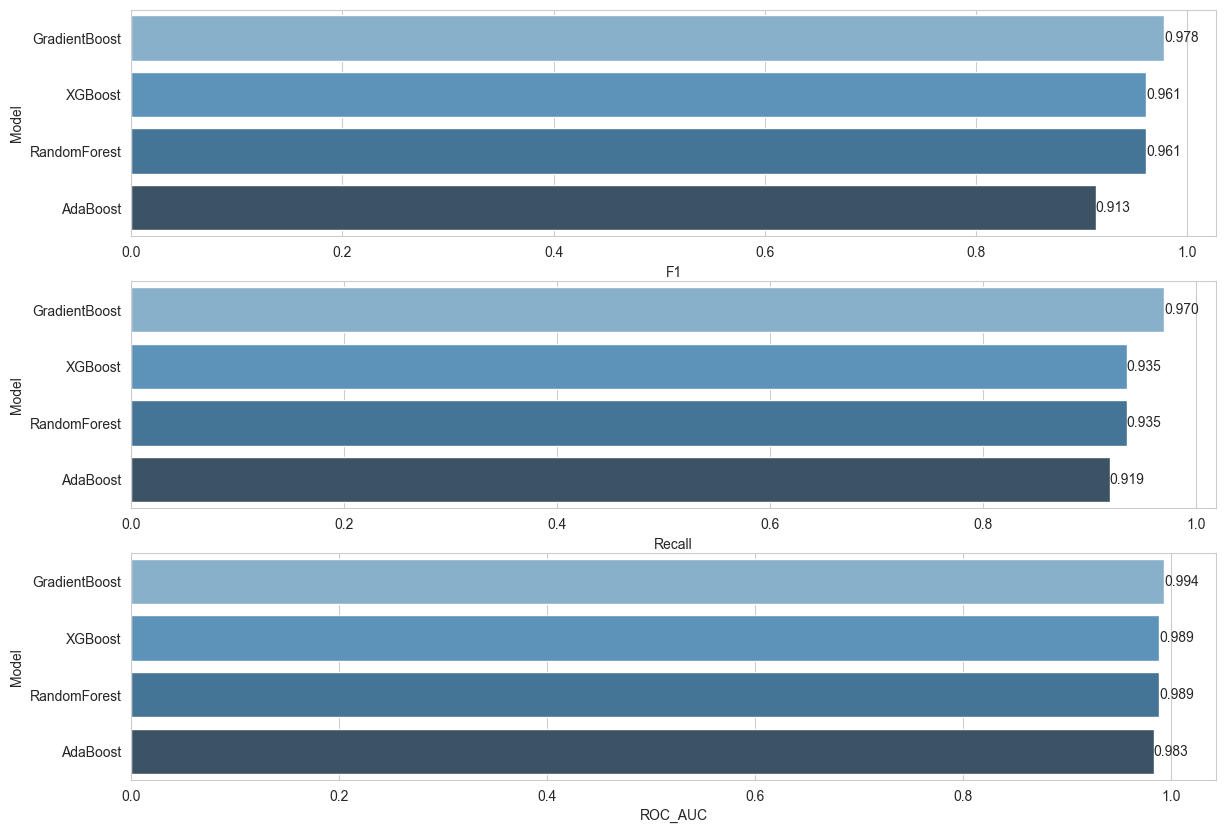

In [123]:
compare = pd.DataFrame({"Model": ["AdaBoost","GradientBoost", "XGBoost", "RandomForest"],
                        "F1": [ada_f1, gb_f1, xgb_f1, rf_f1],
                        "Recall": [ada_recall, gb_recall, xgb_recall, rf_recall],
                        "ROC_AUC": [ada_auc, gb_auc, xgb_auc,rf_auc]})


plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show()

####  4.3.3 Prediction
- Make a demo prediction 

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### 5.1. Final Model

### 5.2. Save and Export the Best Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___